In [1]:
import numpy as np
import pandas as pd

In [2]:
car=pd.read_csv("car data.csv")

In [3]:
car.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [4]:
car.shape

(301, 9)

In [5]:
car['Fuel_Type'].unique(),car['Seller_Type'].unique(),car['Transmission'].unique()

(array(['Petrol', 'Diesel', 'CNG'], dtype=object),
 array(['Dealer', 'Individual'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object))

In [6]:
car['yr']=car['Year']-2000

In [7]:
car.head(4)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,yr
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,14
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,13
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,17
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11


In [8]:
car.drop(["Car_Name",'Year'],axis=1,inplace=True)

In [9]:
fuel_type=pd.get_dummies(car['Fuel_Type'],drop_first=True)
Seller_Type=pd.get_dummies(car['Seller_Type'],drop_first=True)
Transmission=pd.get_dummies(car['Transmission'],drop_first=True)
fuel_type


,Diesel,Petrol
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
296,1,0
297,0,1
298,0,1
299,1,0


In [10]:
car=pd.concat([car,fuel_type,Seller_Type,Transmission],axis=1)

In [11]:
car.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,yr,Diesel,Petrol,Individual,Manual
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,14,0,1,0,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,13,1,0,0,1
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,17,0,1,0,1


In [20]:
car.drop(['Fuel_Type','Seller_Type','Transmission'],axis=1,inplace=True)

In [21]:
x=car.drop('Selling_Price',axis=1)
y=car['Selling_Price']

In [22]:
car.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,yr,Diesel,Petrol,Individual,Manual
0,3.35,5.59,27000,0,14,0,1,0,1
1,4.75,9.54,43000,0,13,1,0,0,1
2,7.25,9.85,6900,0,17,0,1,0,1


# feature importance

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [34]:
print(model.feature_importances_)
fea_imp=model.feature_importances_

[3.87952241e-01 4.17466451e-02 3.40694101e-04 8.08492868e-02
 2.23543188e-01 1.06791496e-02 1.24187790e-01 1.30701006e-01]


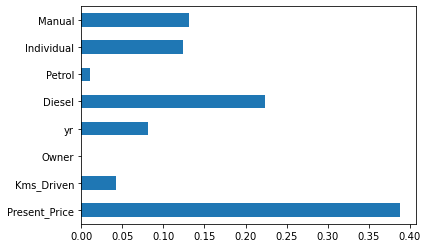

In [41]:
pd.Series(fea_imp,index=x.columns).plot(kind='barh')

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000188C9F73F48>,
      dtype=object)

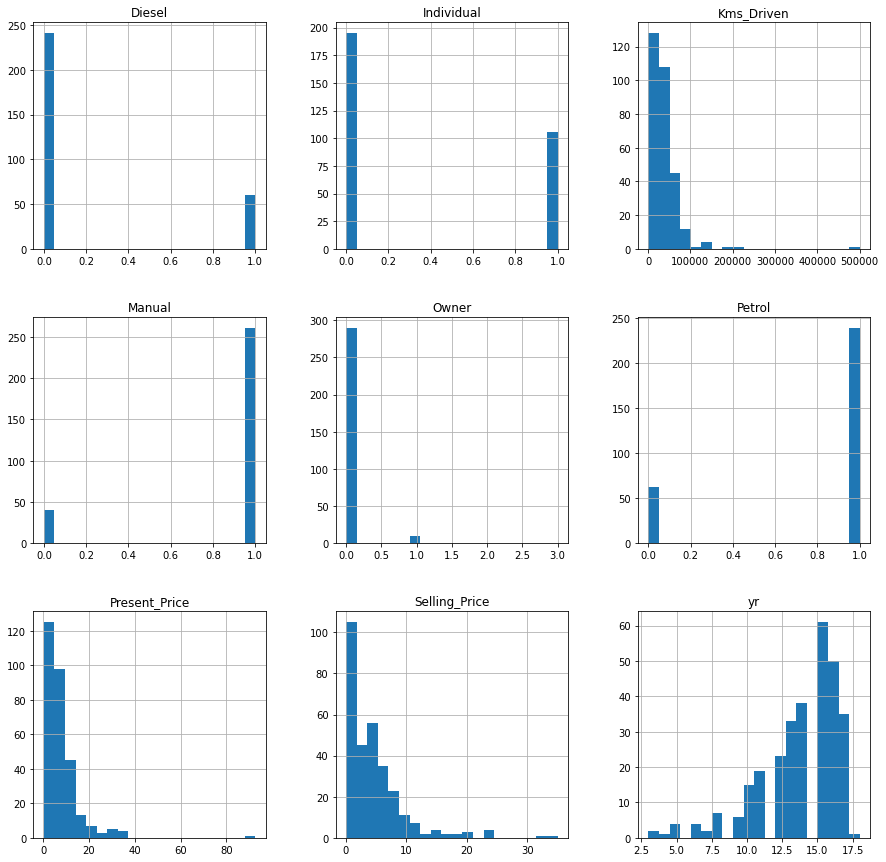

In [30]:
car.hist(bins=20,figsize=(15,15))

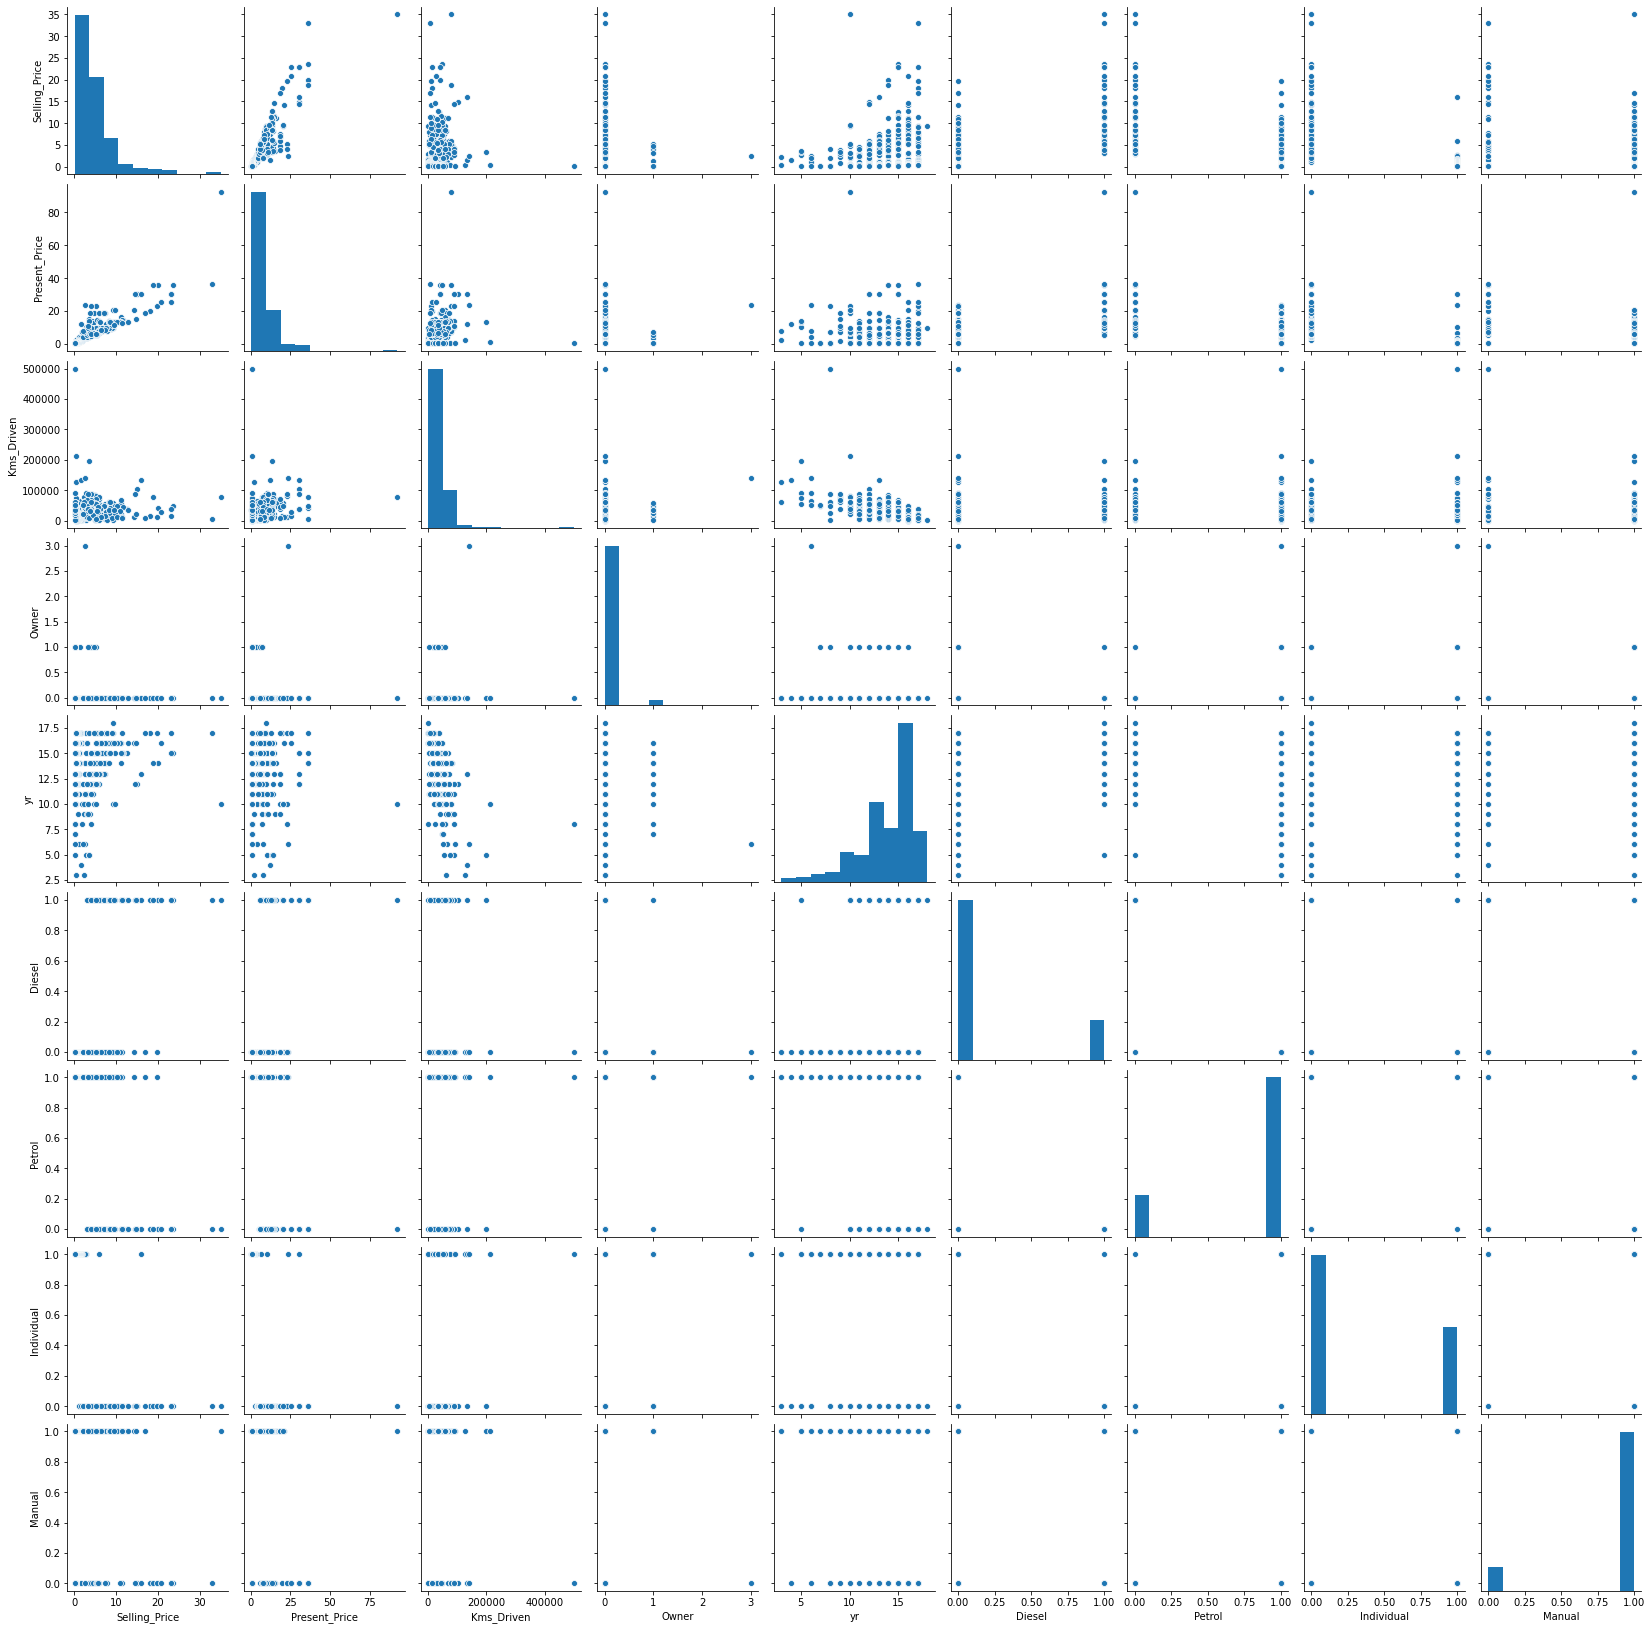

In [31]:
sns.pairplot(car)

In [42]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [43]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [45]:
from sklearn.model_selection import RandomizedSearchCV


In [47]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [48]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [49]:
random=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error', 
                          n_iter = 10, cv = 5,verbose=3,random_state=42,n_jobs=1)

In [50]:
random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-2.606, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-18.985, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-4.320, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-5.027, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, score=-1.166, total=   2.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, score=-1.904, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, sc

[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, score=-1.018, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-2.218, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-15.927, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-3.120, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-4

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [52]:
random.best_params_,random.best_score_

({'n_estimators': 1000,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 25},
 -4.00810159537097)

In [54]:
pred=random.predict(x_test)

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE:',mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

MAE: 0.8910356043956063
MSE: 3.974784142771431
RMSE: 1.9936860692625185


In [62]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random, file)

In [84]:
# pred(x_train)
arr =x_train.to_numpy()
random.predict([arr[123]])

array([0.58085])

In [85]:
arr2 =y_train.to_numpy()
arr2[123]

0.6